# Load Libraries

In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load Data

In [2]:
df_all = pd.read_csv("continuous dataset.csv", parse_dates = ['datetime'], index_col = ['datetime'])

print("There are %0.0f" %df_all.shape[0] + " repeated measures and %0.0f" %df_all.shape[1] +" variables in the dataset" )
 
df_all.head()

There are 48048 repeated measures and 16 variables in the dataset


,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
datetime,,,,,,,,,,,,,,,,
2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0


In [3]:
df_all

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
datetime,,,,,,,,,,,,,,,,
2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26 20:00:00,1128.5592,27.246545,0.020303,0.055511,9.289304,25.715295,0.019746,0.121552,1.990773,23.746545,0.018381,0.150879,2.444658,0,0,1
2020-06-26 21:00:00,1112.7488,27.099573,0.020395,0.053848,9.837504,25.552698,0.019632,0.153870,2.094459,23.693323,0.018320,0.156311,2.515814,0,0,1
2020-06-26 22:00:00,1081.5680,26.971155,0.020448,0.057251,10.262464,25.393030,0.019518,0.144531,2.396369,23.658655,0.018327,0.153259,2.800717,0,0,1


In [4]:
print(df_all.iloc[1:50, :2])

                     nat_demand    T2M_toc
datetime                                  
2015-01-03 02:00:00    912.1755  25.899255
2015-01-03 03:00:00    900.2688  25.937280
2015-01-03 04:00:00    889.9538  25.957544
2015-01-03 05:00:00    893.6865  25.973840
2015-01-03 06:00:00    879.2323  26.034143
2015-01-03 07:00:00    932.4876  26.691492
2015-01-03 08:00:00   1048.9720  27.674066
2015-01-03 09:00:00   1167.9074  28.760400
2015-01-03 10:00:00   1257.5069  29.766656
2015-01-03 11:00:00   1254.5830  30.523767
2015-01-03 12:00:00   1216.9004  30.981805
2015-01-03 13:00:00   1202.1556  31.211206
2015-01-03 14:00:00   1197.2616  31.156519
2015-01-03 15:00:00   1169.0034  30.816766
2015-01-03 16:00:00   1136.7054  30.057214
2015-01-03 17:00:00   1101.9447  28.802454
2015-01-03 18:00:00   1107.0406  27.366357
2015-01-03 19:00:00   1142.1548  26.613947
2015-01-03 20:00:00   1097.2334  26.267267
2015-01-03 21:00:00   1074.6544  26.083521
2015-01-03 22:00:00   1041.3244  25.956293
2015-01-03 

# Prepare Data

In [5]:
df = df_all['nat_demand'].resample('W').sum()  
          
df.shape

(287,)

In [8]:
df = df[1:273]            #Removing pandemic effects
df

datetime
2015-01-18    188082.3152
2015-01-25    179448.7184
2015-02-01    184393.4256
2015-02-08    187290.1846
2015-02-15    180467.2458
                 ...     
2020-03-01    204924.9816
2020-03-08    219065.4724
2020-03-15    216436.7037
2020-03-22    200434.6963
2020-03-29    182955.6070
Freq: W-SUN, Name: nat_demand, Length: 272, dtype: float64

## Train and Test data split

<AxesSubplot:xlabel='datetime'>

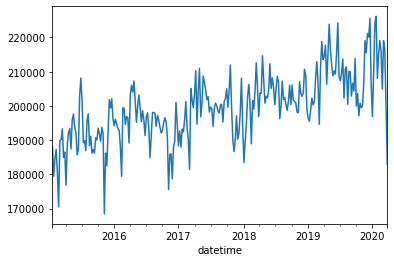

In [9]:
df.plot()

In [10]:
df_train = df[1:219]
df_test = df[219:273]      # perdicting from 2019/3/24 to 2020/3/22

## Checking for stationarity

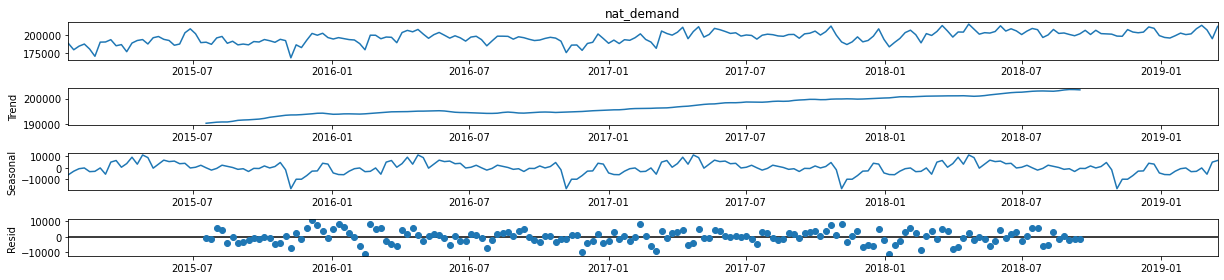

In [69]:
decomp = sm.tsa.seasonal_decompose(df_train,model = 'additive')
fig = decomp.plot()
fig.set_figwidth(20)

In [70]:
adf = adfuller(df_train)
print('adfuller test P-Value: ', adf[1])

adfuller test P-Value:  0.02074130218922233


**P-Value is less than 0.05, therefore we reject the null therefore the series is staionary**

# ARIMA 

## Manual Hyperparameters Tunning

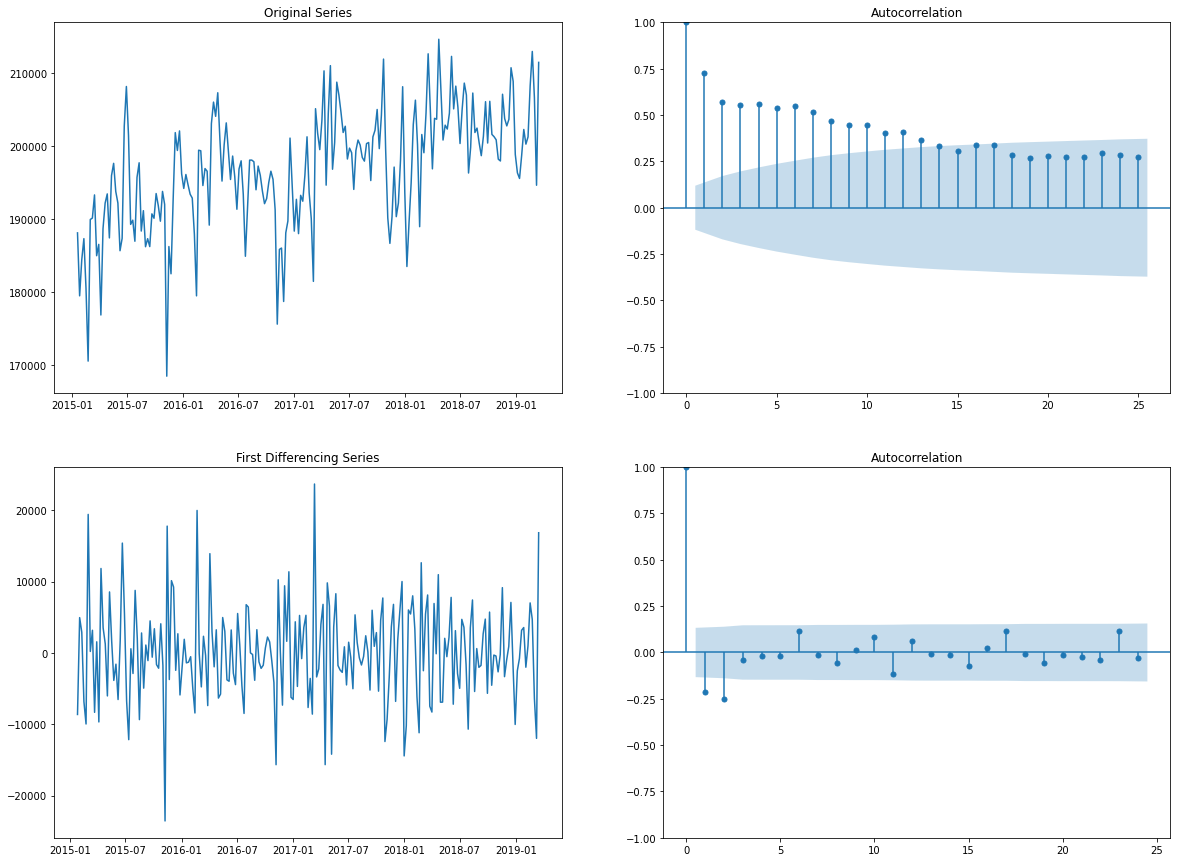

In [71]:
fig, axes = plt.subplots(2, 2, figsize = (20,15))
axes[0,0].plot(df_train)
axes[0,0].set_title('Original Series')
plot_acf(df, ax=axes[0,1])
axes[1,0].plot(df_train.diff())
axes[1,0].set_title('First Differencing Series')
plot_acf(df_train.diff().dropna(), ax=axes[1,1])
plt.show()

**This result agrees with ADF test, so I'm going to set order of differencing (d) to be 0**

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


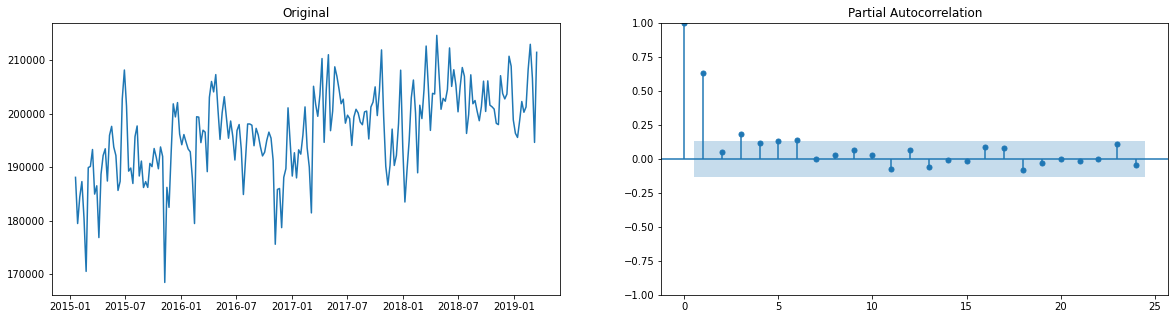

In [72]:
fig, axes = plt.subplots(1, 2, figsize = (20,5))
axes[0].plot(df_train); axes[0].set_title('Original')
#axes[1].set(ylim=(0,5))
plot_pacf(df_train, ax=axes[1])

plt.show()

**PACF lag 1 is slightly above significance limit, I will choose AR term (p) to be 1**

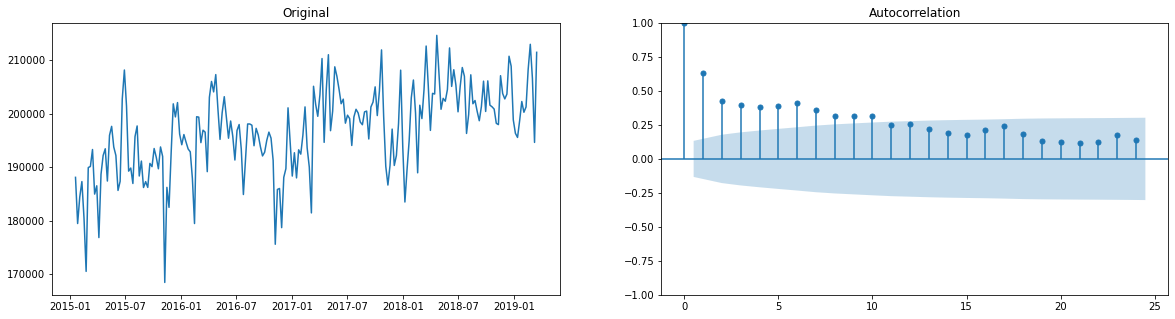

In [73]:
fig, axes = plt.subplots(1, 2, figsize = (20,5))
axes[0].plot(df_train); axes[0].set_title('Original')
plot_acf(df_train, ax=axes[1])

plt.show()

**From ACF lag, we would choose the number of terms that siginicantly above significance limit to keep a simpler model,
So in this came, I will choose MA term (q) to be 2**

## Train Model

In [74]:
model = ARIMA(df_train,exog = None, order = (1,0,2)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             nat_demand   No. Observations:                  218
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -2200.850
Date:                Fri, 31 Mar 2023   AIC                           4411.700
Time:                        20:03:35   BIC                           4428.622
Sample:                    01-18-2015   HQIC                          4418.535
                         - 03-17-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.968e+05   3712.062     53.026      0.000     1.9e+05    2.04e+05
ar.L1          0.9756      0.022     44.091      0.000       0.932       1.019
ma.L1         -0.4420      0.067     -6.631      0.000      -0.573      -0.311
ma.L2         -0.3202      0.069     -4.641      0.000      -0.455      -0.185
sigma2      3.315e+07      0.053   6.29e+08      0.000    3.32e+07    3.32e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                11.37
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.73   Skew:                            -0.21
Prob(H) (two-sided):                  0.18   Kurtosis:                         4.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.49e+25. Standard errors may be unstable.
"""

## Model Evaluation

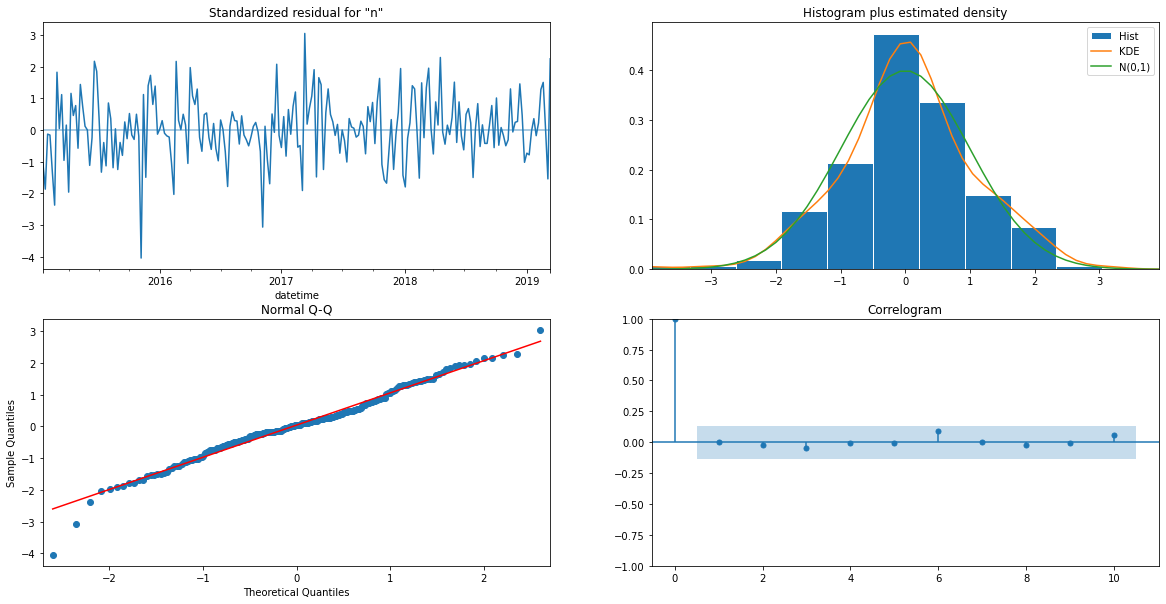

In [75]:
model.plot_diagnostics(figsize=(20,10))
plt.show()

## Predict test dataset

In [76]:
pred = model.predict(start = len(df_train),end = len(df)-2) # start and end index 
print("The Root Mean Squared Error is: "+ str(np.sqrt(mean_squared_error(df_test,pred)))) 

The Root Mean Squared Error is: 12745.584682112894


<AxesSubplot:xlabel='datetime'>

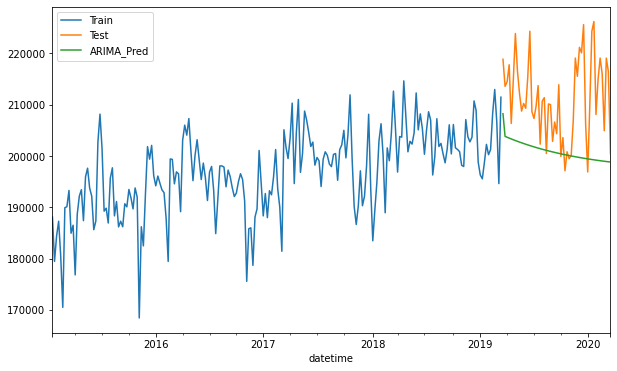

In [77]:
df_train.plot(legend = True,label = 'Train', figsize=(10,6))
df_test.plot(legend = True,label = 'Test')
pred.plot(legend = True,label = 'ARIMA_Pred')

# Auto ARIMA/SARIMA

## Train Model 

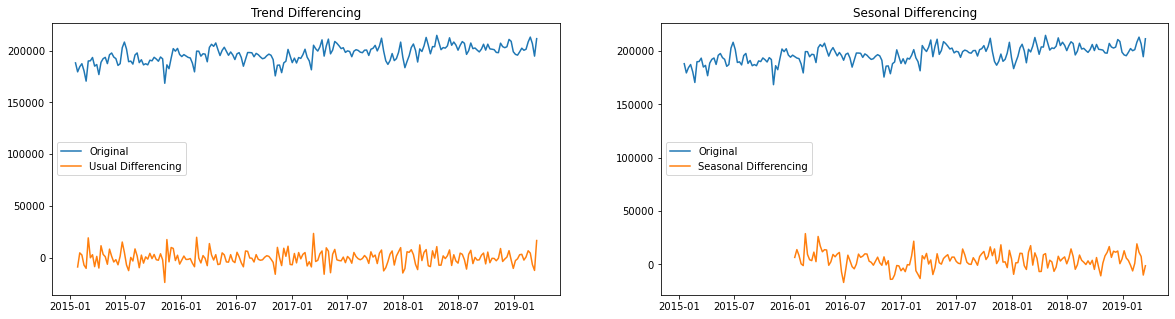

In [78]:
fig, axes = plt.subplots(1, 2, figsize = (20,5))
axes[0].plot(df_train, label= 'Original')
axes[0].plot(df_train.diff(1), label= 'Usual Differencing')             
axes[0].set_title('Trend Differencing')
axes[0].legend(loc='center left', fontsize=10)
axes[1].plot(df_train, label= 'Original')
axes[1].plot(df_train.diff(52), label= 'Seasonal Differencing')             
axes[1].set_title('Sesonal Differencing')
axes[1].legend(loc='center left', fontsize=10)
plt.show()

**There is no strong evidence that this series has seasonality**

In [79]:
arima= auto_arima(df_train,trace=True, error_action='ignore', test = 'adf',
                         start_p=1,start_q=1,max_p=10,max_q=10,m=1, D=0,      #D is the seasonal difference m is time step 
                   suppress_warnings=True,stepwise=True,seasonal=False)
arima.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=4439.308, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5935.911, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5780.440, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=4425.816, Time=0.45 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.21 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=4421.905, Time=0.63 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.33 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=4446.972, Time=0.45 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.74 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.45 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=inf, Time=0.43 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=0.79 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=4424.894, Time=0.56 sec

Best model:  ARIMA(3,0,1)(0,0,0)[0]          
Total fit time: 5.599

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  218
Model:               SARIMAX(3, 0, 1)   Log Likelihood               -2205.953
Date:                Fri, 31 Mar 2023   AIC                           4421.905
Time:                        20:04:41   BIC                           4438.828
Sample:                    01-18-2015   HQIC                          4428.741
                         - 03-17-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3450      0.088     15.308      0.000       1.173       1.517
ar.L2         -0.5280      0.122     -4.330      0.000      -0.767      -0.289
ar.L3          0.1829      0.091      2.018      0.044       0.005       0.361
ma.L1         -0.8017      0.073    -10.982      0.000      -0.945      -0.659
sigma2      3.963e+07   6.31e-10   6.28e+16      0.000    3.96e+07    3.96e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 6.68
Prob(Q):                              0.82   Prob(JB):                         0.04
Heteroskedasticity (H):               0.71   Skew:                            -0.11
Prob(H) (two-sided):                  0.14   Kurtosis:                         3.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.3e+32. Standard errors may be unstable.
"""

## Model Evaluation

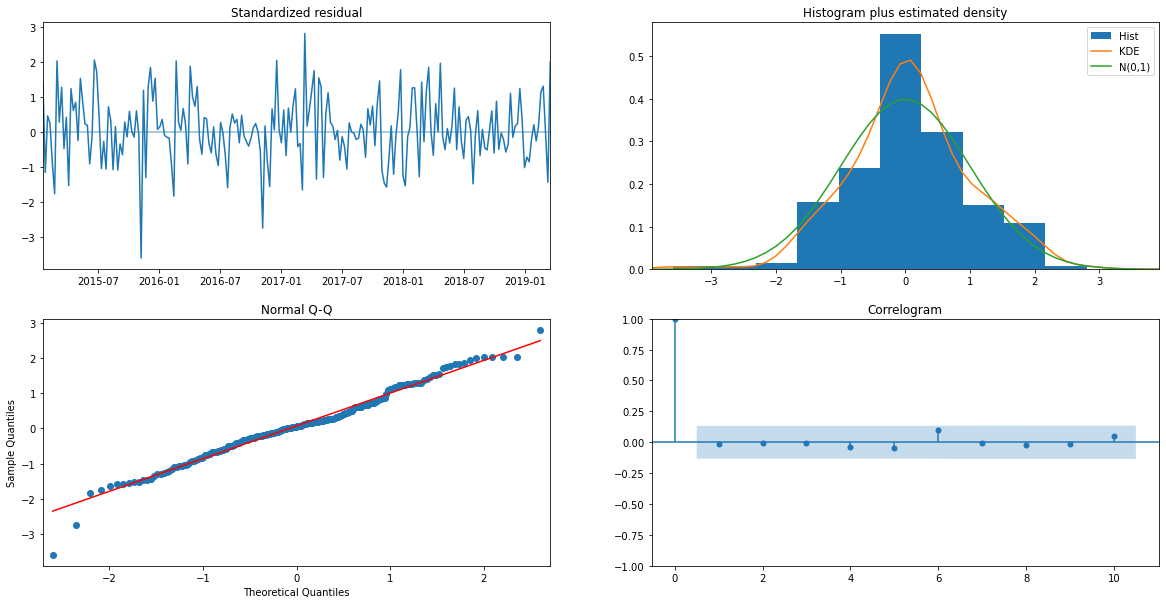

In [80]:
arima.plot_diagnostics(figsize=(20,10))
plt.show()

In [81]:
print("The Root Mean Squared Error is: "+ str(np.sqrt(mean_squared_error(df_test,pred))))

The Root Mean Squared Error is: 12745.584682112894


## Predict test dataset

<AxesSubplot:xlabel='datetime'>

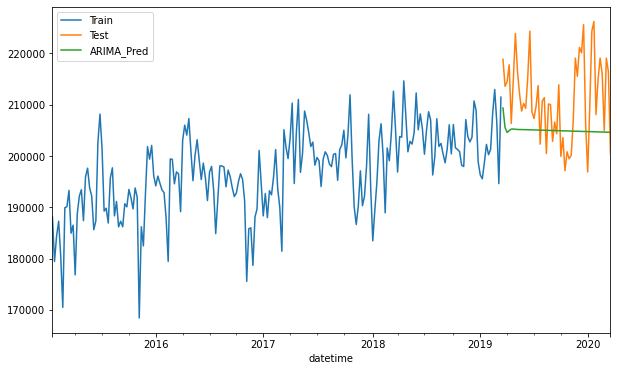

In [82]:
pred = arima.predict(n_periods = len(df_test) ) # set number of periods
df_train.plot(legend = True,label = 'Train', figsize=(10,6))
df_test.plot(legend = True,label = 'Test')
pred.plot(legend = True,label = 'ARIMA_Pred')

**This is a good improvment compare to the previous model**

# Auto ARIMA with Exogenous variables

In [83]:
df_exo = df_all.resample('W').sum().iloc[:,1:]        # Adding exogenous variable into our ARIMA model 
exo_train = df_exo[2:220]
exo_test = df_exo[220:273]

## Include only those exogenous variables that are significant

In [84]:
arimax= auto_arima(df_train,trace=True, X = exo_train[['T2M_toc','TQL_toc','QV2M_san','QV2M_dav','holiday']] 
                   , error_action='ignore', test = 'adf', approximation=False
                   , start_p=0,start_q=0,max_p=10,max_q=10,m=1, D=0,      # D is the seasonal difference m is time step 
                   suppress_warnings=True,stepwise=True,seasonal=False)
arimax.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5464.301, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=4282.008, Time=0.46 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4388.506, Time=0.77 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=4269.989, Time=0.68 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=4261.630, Time=0.97 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=4258.813, Time=0.71 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=4255.799, Time=0.93 sec
 ARIMA(6,0,0)(0,0,0)[0]             : AIC=4257.615, Time=1.41 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=4252.408, Time=1.35 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=4250.780, Time=1.08 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=4249.808, Time=1.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=4247.823, Time=1.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=4253.388, Time=0.91 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=4248.960, Time=1.15 sec
 ARIMA(1,0,2)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  218
Model:               SARIMAX(1, 0, 2)   Log Likelihood               -2114.776
Date:                Fri, 31 Mar 2023   AIC                           4247.552
Time:                        20:06:01   BIC                           4278.013
Sample:                    01-18-2015   HQIC                          4259.856
                         - 03-17-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
T2M_toc       43.4784      2.214     19.641      0.000      39.140      47.817
TQL_toc     -337.0727     63.730     -5.289      0.000    -461.981    -212.164
QV2M_san    4.081e+04   5842.836      6.985      0.000    2.94e+04    5.23e+04
QV2M_dav   -4.255e+04   7221.460     -5.892      0.000   -5.67e+04   -2.84e+04
holiday     -152.5727     11.533    -13.229      0.000    -175.177    -129.968
ar.L1          0.9939      0.011     89.384      0.000       0.972       1.016
ma.L1         -0.5359      0.075     -7.138      0.000      -0.683      -0.389
ma.L2         -0.2179      0.071     -3.048      0.002      -0.358      -0.078
sigma2      1.564e+07     16.978   9.21e+05      0.000    1.56e+07    1.56e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.71
Prob(Q):                              0.96   Prob(JB):                         0.43
Heteroskedasticity (H):               1.27   Skew:                             0.14
Prob(H) (two-sided):                  0.31   Kurtosis:                         2.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.83e+21. Standard errors may be unstable.
"""

<AxesSubplot:xlabel='datetime'>

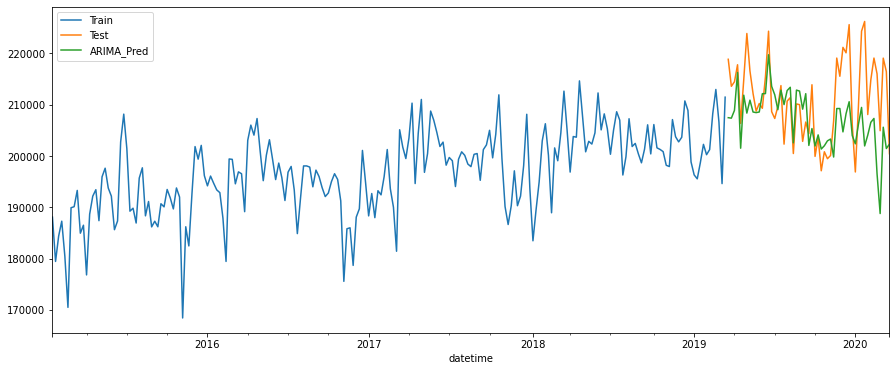

In [85]:
pred_x = arimax.predict(n_periods = len(df_test),X = exo_test[['T2M_toc','TQL_toc','QV2M_san','QV2M_dav','holiday']] ) # set number of periods
df_train.plot(legend = True,label = 'Train', figsize=(15,6)) 
df_test.plot(legend = True,label = 'Test')
pred_x.plot(legend = True,label = 'ARIMA_Pred')

In [86]:
print("The Root Mean Squared Error is: "+ str(np.sqrt(mean_squared_error(df_test,pred_x))))

The Root Mean Squared Error is: 8514.356204666892


## Include all exogenous variables available

In [87]:
arimax= auto_arima(df_train,trace=True, X = exo_train
                   , error_action='ignore', test = 'adf', approximation=False
                   , start_p=0,start_q=0,max_p=10,max_q=10,m=1, D=0,      # D is the seasonal difference m is time step 
                   suppress_warnings=True,stepwise=True,seasonal=False)
arimax.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5457.872, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=4296.772, Time=1.29 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4410.307, Time=1.50 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=4275.696, Time=1.75 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=4272.875, Time=2.04 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=inf, Time=2.08 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=4257.615, Time=2.00 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=4254.508, Time=1.93 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=4258.166, Time=1.68 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=2.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=4255.159, Time=1.77 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=2.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=4258.434, Time=1.91 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 22.141 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  218
Model:               SARIMAX(2, 0, 1)   Log Likelihood               -2108.254
Date:                Fri, 31 Mar 2023   AIC                           4254.508
Time:                        20:06:44   BIC                           4318.813
Sample:                    01-18-2015   HQIC                          4280.482
                         - 03-17-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
T2M_toc       26.7342      9.226      2.898      0.004       8.651      44.818
QV2M_toc   -8494.2048   9264.536     -0.917      0.359   -2.67e+04    9663.952
TQL_toc     -443.1363    143.015     -3.099      0.002    -723.441    -162.832
W2M_toc        1.1473      1.403      0.818      0.413      -1.602       3.897
T2M_san       -2.3720      9.198     -0.258      0.797     -20.400      15.656
QV2M_san     3.64e+04   1.16e+04      3.150      0.002    1.38e+04     5.9e+04
TQL_san     -170.5167    130.399     -1.308      0.191    -426.094      85.061
W2M_san        3.1396      2.852      1.101      0.271      -2.451       8.730
T2M_dav       18.0452     12.898      1.399      0.162      -7.234      43.324
QV2M_dav   -2.738e+04   1.14e+04     -2.399      0.016   -4.98e+04   -5011.471
TQL_dav      334.4758     96.416      3.469      0.001     145.503     523.448
W2M_dav       -6.7886      5.415     -1.254      0.210     -17.402       3.825
Holiday_ID     1.1731      2.813      0.417      0.677      -4.340       6.686
holiday     -171.1999     34.090     -5.022      0.000    -238.016    -104.384
school         7.8003      6.887      1.133      0.257      -5.699      21.299
ar.L1          1.2581      0.117     10.775      0.000       1.029       1.487
ar.L2         -0.2593      0.116     -2.244      0.025      -0.486      -0.033
ma.L1         -0.8902      0.063    -14.120      0.000      -1.014      -0.767
sigma2      1.798e+07     23.265   7.73e+05      0.000     1.8e+07     1.8e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.43   Jarque-Bera (JB):                 0.83
Prob(Q):                              0.51   Prob(JB):                         0.66
Heteroskedasticity (H):               1.37   Skew:                            -0.02
Prob(H) (two-sided):                  0.18   Kurtosis:                         2.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.01e+21. Standard errors may be unstable.
"""

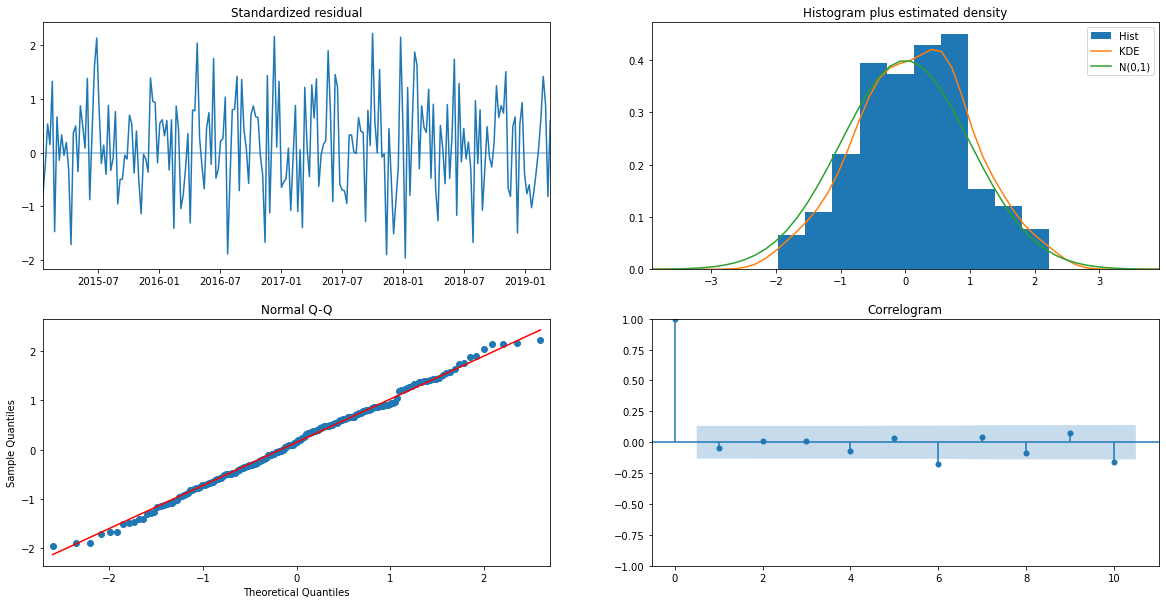

In [88]:
arimax.plot_diagnostics(figsize=(20,10))
plt.show()

**In Normal Q-Q plot. most dots fall perfectly in line with the red line compare to previous results **

<AxesSubplot:xlabel='datetime'>

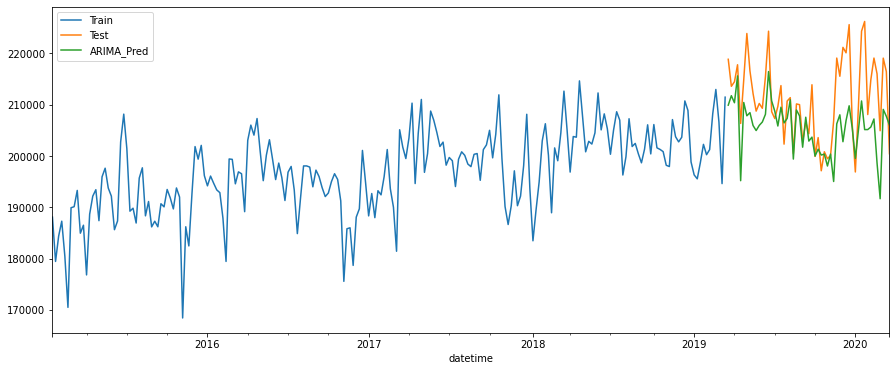

In [89]:
pred_x = arimax.predict(n_periods = len(df_test),X = exo_test) # set number of periods
df_train.plot(legend = True,label = 'Train', figsize=(15,6)) 
df_test.plot(legend = True,label = 'Test')
pred_x.plot(legend = True,label = 'ARIMA_Pred')

In [90]:
print("The Root Mean Squared Error is: "+ str(np.sqrt(mean_squared_error(df_test,pred_x))))

The Root Mean Squared Error is: 8318.041265911334


In [12]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load time series data
data = pd.read_csv('continuous dataset.csv', index_col='date', parse_dates=True)

# Split data into training and test sets
train_size = int(len(data) * 0.8)
train_data, test_data = data.iloc[:train_size], data.iloc[train_size:]

# Normalize data
mean = train_data.mean()
std = train_data.std()
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

# Prepare data for LSTM model
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data)-sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 10
X_train, y_train = create_sequences(train_data.values, sequence_length)
X_test, y_test = create_sequences(test_data.values, sequence_length)

# Build LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train LSTM model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluate LSTM model on test set
mse = model.evaluate(X_test, y_test, verbose=0)
print('Mean Squared Error:', mse)

# Make predictions with LSTM model
predictions = model.predict(X_test)

# Convert predictions back to original scale
predictions = (predictions * std) + mean


ValueError: 'date' is not in list